In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.feature_selection import RFE
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score,confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from matplotlib import pyplot as plt
%matplotlib inline
sns.set(rc={'figure.figsize':[10,10]},font_scale=1.2)


In [2]:
!pip install imblearn

In [3]:
df_train=pd.read_excel("C:/Users/hicha/Desktop/train.xlsx")
df_test=pd.read_excel("C:/Users/hicha/Desktop/test.xlsx")


In [4]:
#df_train.head(5)
df_train.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
!pip install xgboost

In [6]:
df_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
df_train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
df_train.nunique()

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [10]:
nu=df_train.isnull().sum()
nu[nu>0]

Age         177
Cabin       687
Embarked      2
dtype: int64

<AxesSubplot:>

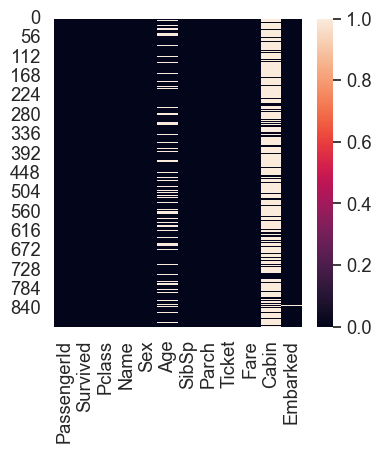

In [11]:
plt.figure(figsize=(4,4)) 
sns.heatmap(df_train.isnull())

## Clean Data

In [12]:
def clean(d):
    d.drop(['Cabin','Name','Ticket','Embarked','Fare'],axis=1,inplace=True)
    d.Age=d.Age.fillna(d.Age.median())
    d.dropna()
    return d

In [13]:
clean(df_train)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,male,22.0,1,0
1,2,1,1,female,38.0,1,0
2,3,1,3,female,26.0,0,0
3,4,1,1,female,35.0,1,0
4,5,0,3,male,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,male,27.0,0,0
887,888,1,1,female,19.0,0,0
888,889,0,3,female,28.0,1,2
889,890,1,1,male,26.0,0,0


In [14]:
clean(df_test)

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,male,34.5,0,0
1,893,3,female,47.0,1,0
2,894,2,male,62.0,0,0
3,895,3,male,27.0,0,0
4,896,3,female,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,male,27.0,0,0
414,1306,1,female,39.0,0,0
415,1307,3,male,38.5,0,0
416,1308,3,male,27.0,0,0


<AxesSubplot:>

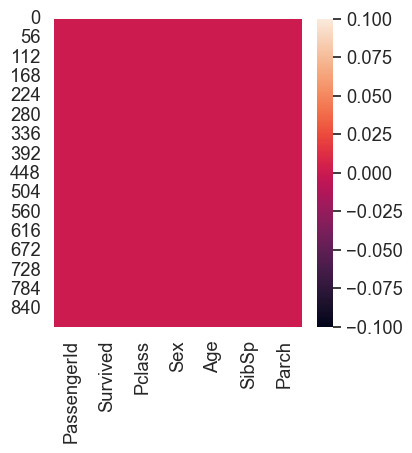

In [15]:
plt.figure(figsize=(4,4))  
sns.heatmap(df_train.isnull())

## Data Analysis

In [16]:
co=df_train.corr()

<AxesSubplot:>

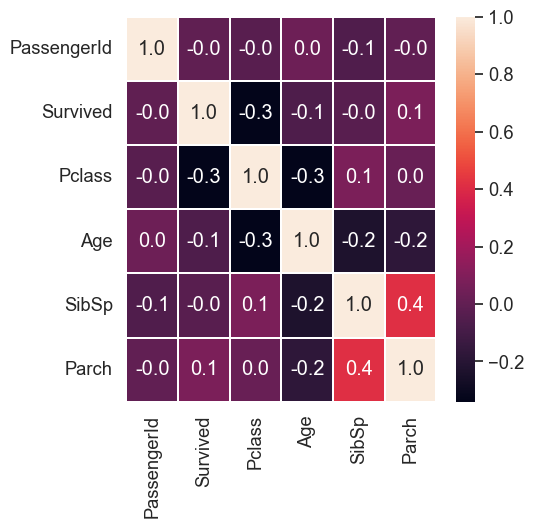

In [17]:
plt.figure(figsize=(5,5))   
sns.heatmap(co,annot=True,fmt='.1f',linewidth=.3)

In [18]:
plt.figure(figsize=(7,6))   
df_train.Survived.value_counts()

0    549
1    342
Name: Survived, dtype: int64

<Figure size 700x600 with 0 Axes>

In [19]:
df_train.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

<AxesSubplot:ylabel='Sex'>

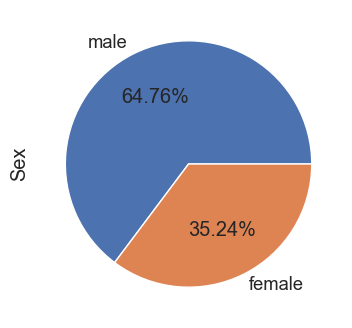

In [20]:
plt.figure(figsize=(4,4))   
df_train.Sex.value_counts().plot.pie(autopct='%0.02f%%')

C:\Users\hicha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

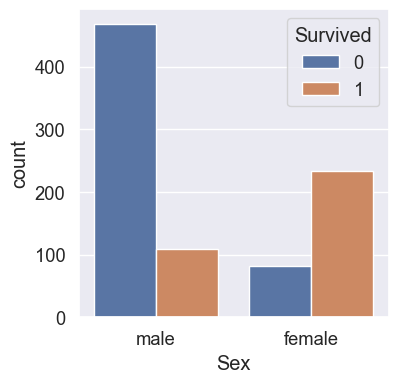

In [21]:
  plt.figure(figsize=(4,4))   
sns.countplot(df_train.Sex,hue=df_train.Survived)

C:\Users\hicha\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

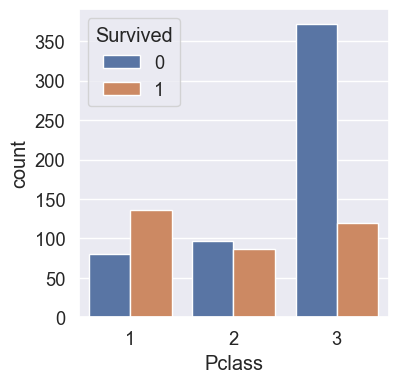

In [22]:
plt.figure(figsize=(4,4))   
sns.countplot(df_train.Pclass,hue=df_train.Survived)

<AxesSubplot:xlabel='Age', ylabel='Count'>

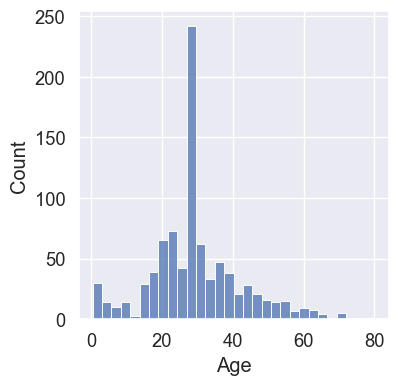

In [23]:
plt.figure(figsize=(4,4))   
sns.histplot(df_train.Age)

## Transform Data

In [24]:
df_train.Sex=df_train.Sex.map({'male':0,'female':1})
df_test.Sex=df_test.Sex.map({'male':0,'female':1})
#df_test.Sex=pd.get_dummies(df_test.Sex)

In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Sex          891 non-null    int64  
 4   Age          891 non-null    float64
 5   SibSp        891 non-null    int64  
 6   Parch        891 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 48.9 KB


In [26]:
df_test

,PassengerId,Pclass,Sex,Age,SibSp,Parch
0,892,3,0,34.5,0,0
1,893,3,1,47.0,1,0
2,894,2,0,62.0,0,0
3,895,3,0,27.0,0,0
4,896,3,1,22.0,1,1
...,...,...,...,...,...,...
413,1305,3,0,27.0,0,0
414,1306,1,1,39.0,0,0
415,1307,3,0,38.5,0,0
416,1308,3,0,27.0,0,0


In [27]:
df_train

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch
0,1,0,3,0,22.0,1,0
1,2,1,1,1,38.0,1,0
2,3,1,3,1,26.0,0,0
3,4,1,1,1,35.0,1,0
4,5,0,3,0,35.0,0,0
...,...,...,...,...,...,...,...
886,887,0,2,0,27.0,0,0
887,888,1,1,1,19.0,0,0
888,889,0,3,1,28.0,1,2
889,890,1,1,0,26.0,0,0


## 5-Creat Model

In [28]:
X=df_train.drop(['Survived'],axis=1)
y=df_train.Survived

In [29]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=.8)

In [30]:
model1=DecisionTreeClassifier()

In [31]:
model1.fit(X_train,y_train)

DecisionTreeClassifier()

In [32]:
#pre=model1.predict(X_train)

In [33]:
#accuracy_score(pre,y_train)

In [34]:
accuracies=[]

In [35]:
def all(model):
    model.fit(X_train,y_train)
    pre=model.predict(X_train)
    accuracy=accuracy_score(pre,y_train)
    print('Accuracy =',accuracy)
    accuracies.append(accuracy)

In [36]:
model1=LogisticRegression()
all(model1)

Accuracy = 0.7851123595505618


C:\Users\hicha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [37]:
model2=RandomForestClassifier()
all(model2)

Accuracy = 1.0


In [38]:
model3=GradientBoostingClassifier()
all(model3)

Accuracy = 0.9002808988764045


In [39]:
model4=DecisionTreeClassifier()
all(model4)

Accuracy = 1.0


In [40]:
model5=KNeighborsClassifier()
all(model5)

Accuracy = 0.6896067415730337


C:\Users\hicha\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [41]:
model6=GaussianNB()
all(model6)

Accuracy = 0.7710674157303371


In [42]:
model7=SVC()
all(model7)

Accuracy = 0.6109550561797753


In [43]:
Algorithms=['LogisticRegression','RandomForestClassifier','GradientBoostingClassifier','DecisionTreeClassifier','KNeighborsClassifier','GaussianNB','SVC',]

In [44]:
new=pd.DataFrame({'Algorithms':Algorithms,'accuracies':accuracies})

In [45]:
new

,Algorithms,accuracies
0,LogisticRegression,0.785112
1,RandomForestClassifier,1.000000
2,GradientBoostingClassifier,0.900281
3,DecisionTreeClassifier,1.000000
4,KNeighborsClassifier,0.689607
5,GaussianNB,0.771067
6,SVC,0.610955


In [46]:
modelx=LogisticRegression()
modelx.fit(X_train,y_train)

C:\Users\hicha\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
predt=modelx.predict(df_test)

In [48]:
finl=df_test.PassengerId

In [49]:
new_dataframe=pd.DataFrame({'PassengerId':finl,'Survived':predt})

In [50]:
new_dataframe.to_csv('submission.csv',index=False)